In [45]:
import os
import requests
import pandas as pd
import json
from dotenv import load_dotenv
import pprint
!pip install tiingo


In [46]:
TIINGO_API_KEY = os.getenv("1b545063658e8ac3669f26afd4f3439ff66adb3f")
load_dotenv()

True

In [47]:
import requests

headers = {
        'Content-Type': 'application/json'
        }
requestResponse = requests.get("https://api.tiingo.com/api/test?token=1b545063658e8ac3669f26afd4f3439ff66adb3f",
                                    headers=headers)
print(requestResponse.json())
                                 

{'message': 'You successfully sent a request'}


In [48]:
from tiingo import TiingoClient

config = {
    'api_key': '1b545063658e8ac3669f26afd4f3439ff66adb3f',
    'session': True # Reuse HTTP sessions across API calls for better performance
}

# Throughout the rest of this notebook, you'll use the "client" to interact with the Tiingo backend services.
client = TiingoClient(config)

In [49]:
# You can obtain cryptocurrency metadata using the following method.
# NOTE: Crypto symbol MUST be encapsulated in brackets as a Python list!

meta_data = client.get_crypto_metadata(['BTCUSD'], fmt='json')

#You can obtain top-of-book cryptocurrency quotes from the ``get_crypto_top_of_book()`` method.
# NOTE: Crypto symbol MUST be encapsulated in brackets as a Python list!

book_data = crypto_price = client.get_crypto_top_of_book(['BTCUSD'])

# You can obtain historical Cryptocurrency price quotes from the get_crypto_price_history() method.
# NOTE: Crypto symbol MUST be encapsulated in brackets as a Python list!

history_data_BTC = client.get_crypto_price_history(tickers = ['BTCUSD'], startDate='2020-12-1',
                                endDate='2021-11-30', resampleFreq='1Day')

In [50]:
history_data_BTC

[{'ticker': 'btcusd',
  'baseCurrency': 'btc',
  'quoteCurrency': 'usd',
  'priceData': [{'high': 19902.917357628077,
    'date': '2020-12-01T00:00:00+00:00',
    'volume': 172122.84580794908,
    'low': 18062.89812033529,
    'open': 19690.216670754748,
    'close': 18793.893916419034,
    'volumeNotional': 3234858504.7067456,
    'tradesDone': 2118819.0},
   {'high': 19339.721844582993,
    'date': '2020-12-02T00:00:00+00:00',
    'volume': 99301.03448131388,
    'low': 18333.281531012995,
    'open': 18780.031909617115,
    'close': 19208.893093693732,
    'volumeNotional': 1907462955.4447534,
    'tradesDone': 1636220.0},
   {'high': 19604.522036807055,
    'date': '2020-12-03T00:00:00+00:00',
    'volume': 87118.9630710539,
    'low': 18872.26551162489,
    'open': 19208.764210122692,
    'close': 19428.2042743612,
    'volumeNotional': 1692565010.714965,
    'tradesDone': 1297704.0},
   {'high': 19532.317111151377,
    'date': '2020-12-04T00:00:00+00:00',
    'volume': 95732.3545

In [51]:
history_data_BTC[0]['priceData']

[{'high': 19902.917357628077,
  'date': '2020-12-01T00:00:00+00:00',
  'volume': 172122.84580794908,
  'low': 18062.89812033529,
  'open': 19690.216670754748,
  'close': 18793.893916419034,
  'volumeNotional': 3234858504.7067456,
  'tradesDone': 2118819.0},
 {'high': 19339.721844582993,
  'date': '2020-12-02T00:00:00+00:00',
  'volume': 99301.03448131388,
  'low': 18333.281531012995,
  'open': 18780.031909617115,
  'close': 19208.893093693732,
  'volumeNotional': 1907462955.4447534,
  'tradesDone': 1636220.0},
 {'high': 19604.522036807055,
  'date': '2020-12-03T00:00:00+00:00',
  'volume': 87118.9630710539,
  'low': 18872.26551162489,
  'open': 19208.764210122692,
  'close': 19428.2042743612,
  'volumeNotional': 1692565010.714965,
  'tradesDone': 1297704.0},
 {'high': 19532.317111151377,
  'date': '2020-12-04T00:00:00+00:00',
  'volume': 95732.35454455041,
  'low': 18588.699197046004,
  'open': 19428.600979366107,
  'close': 18675.32401978046,
  'volumeNotional': 1787832740.2959814,
  

In [52]:
# turn date into index and rename price data for each asset to make easier to concat

In [53]:
Historical_Crypto_BTC=pd.DataFrame(history_data_BTC[0]['priceData'])

In [54]:
BTC_DAILY_CLOSE = Historical_Crypto_BTC.set_index('date')[['close']].rename(columns={'close':'BTC_DAILY_CLOSE'})

In [55]:
BTC_DAILY_CLOSE

,BTC_DAILY_CLOSE
date,
2020-12-01T00:00:00+00:00,18793.893916
2020-12-02T00:00:00+00:00,19208.893094
2020-12-03T00:00:00+00:00,19428.204274
2020-12-04T00:00:00+00:00,18675.324020
2020-12-05T00:00:00+00:00,19149.959281
...,...
2021-11-26T00:00:00+00:00,53729.054030
2021-11-27T00:00:00+00:00,54735.965606
2021-11-28T00:00:00+00:00,57291.753134


In [56]:
!pip install python-dateutil

In [57]:
pd.to_datetime(BTC_DAILY_CLOSE.index).date

array([datetime.date(2020, 12, 1), datetime.date(2020, 12, 2),
       datetime.date(2020, 12, 3), datetime.date(2020, 12, 4),
       datetime.date(2020, 12, 5), datetime.date(2020, 12, 6),
       datetime.date(2020, 12, 7), datetime.date(2020, 12, 8),
       datetime.date(2020, 12, 9), datetime.date(2020, 12, 10),
       datetime.date(2020, 12, 11), datetime.date(2020, 12, 12),
       datetime.date(2020, 12, 13), datetime.date(2020, 12, 14),
       datetime.date(2020, 12, 15), datetime.date(2020, 12, 16),
       datetime.date(2020, 12, 17), datetime.date(2020, 12, 18),
       datetime.date(2020, 12, 19), datetime.date(2020, 12, 20),
       datetime.date(2020, 12, 21), datetime.date(2020, 12, 22),
       datetime.date(2020, 12, 23), datetime.date(2020, 12, 24),
       datetime.date(2020, 12, 25), datetime.date(2020, 12, 26),
       datetime.date(2020, 12, 27), datetime.date(2020, 12, 28),
       datetime.date(2020, 12, 29), datetime.date(2020, 12, 30),
       datetime.date(2020, 12, 31)

In [58]:
BTC_DAILY_CLOSE.index = pd.to_datetime(BTC_DAILY_CLOSE.index).date

In [59]:
BTC_DAILY_CLOSE

,BTC_DAILY_CLOSE
2020-12-01,18793.893916
2020-12-02,19208.893094
2020-12-03,19428.204274
2020-12-04,18675.324020
2020-12-05,19149.959281
...,...
2021-11-26,53729.054030
2021-11-27,54735.965606
2021-11-28,57291.753134
2021-11-29,57798.563566


In [60]:
history_data_ETH = client.get_crypto_price_history(tickers = ['ETHUSD'], startDate='2020-12-1',
                                endDate='2021-11-30', resampleFreq='1Day')

In [61]:
history_data_ETH

[{'ticker': 'ethusd',
  'baseCurrency': 'eth',
  'quoteCurrency': 'usd',
  'priceData': [{'high': 635.8877563349442,
    'date': '2020-12-01T00:00:00+00:00',
    'tradesDone': 1065674.0,
    'low': 561.0153079430341,
    'volume': 2847758.3135092603,
    'open': 616.1559541585913,
    'close': 586.1392318198046,
    'volumeNotional': 1669182870.2887802},
   {'high': 604.8983457024601,
    'date': '2020-12-02T00:00:00+00:00',
    'tradesDone': 597962.0,
    'low': 575.2330843344064,
    'volume': 1319983.3455787299,
    'open': 585.8123278918125,
    'close': 596.9978052601471,
    'volumeNotional': 788027160.290448},
   {'high': 623.6223215261864,
    'date': '2020-12-03T00:00:00+00:00',
    'tradesDone': 542625.0,
    'low': 585.9732826030248,
    'volume': 1247079.32049281,
    'open': 596.9770496596266,
    'close': 615.849543984262,
    'volumeNotional': 768013230.8377005},
   {'high': 620.0825544395246,
    'date': '2020-12-04T00:00:00+00:00',
    'tradesDone': 625479.0,
    'low'

In [62]:
history_data_ETH[0]['priceData']

[{'high': 635.8877563349442,
  'date': '2020-12-01T00:00:00+00:00',
  'tradesDone': 1065674.0,
  'low': 561.0153079430341,
  'volume': 2847758.3135092603,
  'open': 616.1559541585913,
  'close': 586.1392318198046,
  'volumeNotional': 1669182870.2887802},
 {'high': 604.8983457024601,
  'date': '2020-12-02T00:00:00+00:00',
  'tradesDone': 597962.0,
  'low': 575.2330843344064,
  'volume': 1319983.3455787299,
  'open': 585.8123278918125,
  'close': 596.9978052601471,
  'volumeNotional': 788027160.290448},
 {'high': 623.6223215261864,
  'date': '2020-12-03T00:00:00+00:00',
  'tradesDone': 542625.0,
  'low': 585.9732826030248,
  'volume': 1247079.32049281,
  'open': 596.9770496596266,
  'close': 615.849543984262,
  'volumeNotional': 768013230.8377005},
 {'high': 620.0825544395246,
  'date': '2020-12-04T00:00:00+00:00',
  'tradesDone': 625479.0,
  'low': 567.4676375033324,
  'volume': 1432416.7242723198,
  'open': 615.9496273615458,
  'close': 569.2928342181235,
  'volumeNotional': 815464576.

In [63]:
Historical_Crypto_ETH = pd.DataFrame(history_data_ETH[0]['priceData'])

In [64]:
Historical_Crypto_ETH

,high,date,tradesDone,low,volume,open,close,volumeNotional
0,635.887756,2020-12-01T00:00:00+00:00,1065674.0,561.015308,2.847758e+06,616.155954,586.139232,1.669183e+09
1,604.898346,2020-12-02T00:00:00+00:00,597962.0,575.233084,1.319983e+06,585.812328,596.997805,7.880272e+08
2,623.622322,2020-12-03T00:00:00+00:00,542625.0,585.973283,1.247079e+06,596.977050,615.849544,7.680132e+08
3,620.082554,2020-12-04T00:00:00+00:00,625479.0,567.467638,1.432417e+06,615.949627,569.292834,8.154646e+08
4,597.251290,2020-12-05T00:00:00+00:00,431172.0,561.472555,8.573710e+05,567.415467,596.881932,5.117492e+08
...,...,...,...,...,...,...,...,...
360,4552.818755,2021-11-26T00:00:00+00:00,1512548.0,3917.747777,7.950016e+05,4525.607985,4040.282001,3.212031e+09
361,4184.699619,2021-11-27T00:00:00+00:00,923738.0,4028.972843,4.058045e+05,4042.034941,4096.358260,1.662321e+09
362,4300.158932,2021-11-28T00:00:00+00:00,1002423.0,3969.784111,4.841273e+05,4096.339153,4296.204212,2.079910e+09
363,4461.049022,2021-11-29T00:00:00+00:00,1207596.0,4279.204821,6.317236e+05,4296.424053,4446.448197,2.808926e+09


In [65]:
ETH_DAILY_CLOSE = Historical_Crypto_ETH.set_index('date')[['close']].rename(columns={'close':'ETH_DAILY_CLOSE'})

In [66]:
ETH_DAILY_CLOSE

,ETH_DAILY_CLOSE
date,
2020-12-01T00:00:00+00:00,586.139232
2020-12-02T00:00:00+00:00,596.997805
2020-12-03T00:00:00+00:00,615.849544
2020-12-04T00:00:00+00:00,569.292834
2020-12-05T00:00:00+00:00,596.881932
...,...
2021-11-26T00:00:00+00:00,4040.282001
2021-11-27T00:00:00+00:00,4096.358260
2021-11-28T00:00:00+00:00,4296.204212


In [67]:
pd.to_datetime(ETH_DAILY_CLOSE.index).date

array([datetime.date(2020, 12, 1), datetime.date(2020, 12, 2),
       datetime.date(2020, 12, 3), datetime.date(2020, 12, 4),
       datetime.date(2020, 12, 5), datetime.date(2020, 12, 6),
       datetime.date(2020, 12, 7), datetime.date(2020, 12, 8),
       datetime.date(2020, 12, 9), datetime.date(2020, 12, 10),
       datetime.date(2020, 12, 11), datetime.date(2020, 12, 12),
       datetime.date(2020, 12, 13), datetime.date(2020, 12, 14),
       datetime.date(2020, 12, 15), datetime.date(2020, 12, 16),
       datetime.date(2020, 12, 17), datetime.date(2020, 12, 18),
       datetime.date(2020, 12, 19), datetime.date(2020, 12, 20),
       datetime.date(2020, 12, 21), datetime.date(2020, 12, 22),
       datetime.date(2020, 12, 23), datetime.date(2020, 12, 24),
       datetime.date(2020, 12, 25), datetime.date(2020, 12, 26),
       datetime.date(2020, 12, 27), datetime.date(2020, 12, 28),
       datetime.date(2020, 12, 29), datetime.date(2020, 12, 30),
       datetime.date(2020, 12, 31)

In [68]:
ETH_DAILY_CLOSE.index = pd.to_datetime(ETH_DAILY_CLOSE.index).date

In [69]:
ETH_DAILY_CLOSE

,ETH_DAILY_CLOSE
2020-12-01,586.139232
2020-12-02,596.997805
2020-12-03,615.849544
2020-12-04,569.292834
2020-12-05,596.881932
...,...
2021-11-26,4040.282001
2021-11-27,4096.358260
2021-11-28,4296.204212
2021-11-29,4446.448197


In [70]:
import time
import datetime
import pandas as pd
import requests
import yfinance as yf
import numpy as np
from sklearn import preprocessing

In [71]:
ticker =  ('SPY')
period1 = int(time.mktime(datetime.datetime(2020,12,1,23,59).timetuple()))
period2 = int(time.mktime(datetime.datetime(2021,11,30,23,59).timetuple()))
interval = '1d'

In [72]:
query_string = f'https://query1.finance.yahoo.com/v7/finance/download/{ticker}?period1={period1}&period2={period2}&interval={interval}&events=history&includeAdjustedClose=true'

In [73]:
data_spy = pd.read_csv(query_string)
data_spy.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-12-02,364.820007,366.959991,364.200012,366.790009,360.426422,45927000
1,2020-12-03,366.679993,368.190002,365.500000,366.690002,360.328125,62882000
2,2020-12-04,367.320007,369.850006,367.220001,369.850006,363.433289,50749900
3,2020-12-07,369.019989,369.619995,367.720001,369.089996,362.686462,48944300
4,2020-12-08,367.720001,370.779999,367.670013,370.170013,363.747742,42458900
5,2020-12-09,370.880005,371.049988,365.950012,366.850006,360.485352,74098300
6,2020-12-10,365.369995,367.859985,364.429993,366.730011,360.367432,57735400
7,2020-12-11,364.899994,366.739990,363.260010,366.299988,359.944885,57698600
8,2020-12-14,368.640015,369.799988,364.470001,364.660004,358.333313,69216200
9,2020-12-15,367.399994,369.589996,365.920013,369.589996,363.177795,63865300


In [74]:
spy_daily_close = pd.DataFrame(data_spy)
spy_daily_close

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-12-02,364.820007,366.959991,364.200012,366.790009,360.426422,45927000
1,2020-12-03,366.679993,368.190002,365.500000,366.690002,360.328125,62882000
2,2020-12-04,367.320007,369.850006,367.220001,369.850006,363.433289,50749900
3,2020-12-07,369.019989,369.619995,367.720001,369.089996,362.686462,48944300
4,2020-12-08,367.720001,370.779999,367.670013,370.170013,363.747742,42458900
...,...,...,...,...,...,...,...
246,2021-11-23,467.220001,469.100006,464.450012,468.190002,466.547913,73206500
247,2021-11-24,466.059998,469.570007,465.190002,469.440002,467.793518,61858800
248,2021-11-26,462.339996,463.899994,457.769989,458.970001,457.360260,112669600
249,2021-11-29,464.070007,466.559998,461.730011,464.600006,462.970520,86268800


In [75]:
spy_historical = spy_daily_close[['Date', 'Adj Close']].rename(columns={'Adj Close':'SPY_DAILY_CLOSE'})
spy_historical

,Date,SPY_DAILY_CLOSE
0,2020-12-02,360.426422
1,2020-12-03,360.328125
2,2020-12-04,363.433289
3,2020-12-07,362.686462
4,2020-12-08,363.747742
...,...,...
246,2021-11-23,466.547913
247,2021-11-24,467.793518
248,2021-11-26,457.360260
249,2021-11-29,462.970520


In [76]:
spy_historical.set_index('Date', inplace=True)

In [77]:
spy_historical.index = pd.to_datetime(spy_historical.index).date

In [78]:
spy_historical

,SPY_DAILY_CLOSE
2020-12-02,360.426422
2020-12-03,360.328125
2020-12-04,363.433289
2020-12-07,362.686462
2020-12-08,363.747742
...,...
2021-11-23,466.547913
2021-11-24,467.793518
2021-11-26,457.360260
2021-11-29,462.970520


In [79]:
#Gold from yfinance
ticker =  ('GLD')
period1 = int(time.mktime(datetime.datetime(2020,12,1,23,59).timetuple()))
period2 = int(time.mktime(datetime.datetime(2021,11,30,23,59).timetuple()))
interval = '1d'

In [80]:
query_string = f'https://query1.finance.yahoo.com/v7/finance/download/{ticker}?period1={period1}&period2={period2}&interval={interval}&events=history&includeAdjustedClose=true'

In [81]:
data_gld = pd.read_csv(query_string)
data_gld.head(10)


,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-12-02,170.570007,171.759995,170.149994,171.460007,171.460007,9199700
1,2020-12-03,172.639999,172.850006,171.080002,172.809998,172.809998,10457300
2,2020-12-04,172.779999,173.320007,171.589996,172.320007,172.320007,10098600
3,2020-12-07,172.559998,175.289993,172.509995,174.889999,174.889999,10555100
4,2020-12-08,175.509995,175.929993,174.720001,175.500000,175.500000,6348400
5,2020-12-09,173.919998,174.039993,171.240005,172.500000,172.500000,10743200
6,2020-12-10,172.899994,173.580002,171.699997,172.169998,172.169998,6564000
7,2020-12-11,172.250000,173.320007,172.110001,172.490005,172.490005,6084800
8,2020-12-14,171.910004,172.520004,170.910004,171.539993,171.539993,7644400
9,2020-12-15,173.429993,173.979996,173.059998,173.940002,173.940002,6840500


In [82]:
gld_daily_close = pd.DataFrame(data_gld)
gld_daily_close

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-12-02,170.570007,171.759995,170.149994,171.460007,171.460007,9199700
1,2020-12-03,172.639999,172.850006,171.080002,172.809998,172.809998,10457300
2,2020-12-04,172.779999,173.320007,171.589996,172.320007,172.320007,10098600
3,2020-12-07,172.559998,175.289993,172.509995,174.889999,174.889999,10555100
4,2020-12-08,175.509995,175.929993,174.720001,175.500000,175.500000,6348400
...,...,...,...,...,...,...,...
246,2021-11-23,167.279999,167.600006,166.529999,167.279999,167.279999,8047800
247,2021-11-24,166.580002,167.440002,166.320007,167.119995,167.119995,5359500
248,2021-11-26,168.600006,168.639999,166.369995,166.850006,166.850006,9605200
249,2021-11-29,166.839996,167.259995,166.380005,166.619995,166.619995,7394900


In [83]:
gld_historical = gld_daily_close[['Date', 'Adj Close']].rename(columns={'Adj Close':'GLD_DAILY_CLOSE'})
gld_historical

,Date,GLD_DAILY_CLOSE
0,2020-12-02,171.460007
1,2020-12-03,172.809998
2,2020-12-04,172.320007
3,2020-12-07,174.889999
4,2020-12-08,175.500000
...,...,...
246,2021-11-23,167.279999
247,2021-11-24,167.119995
248,2021-11-26,166.850006
249,2021-11-29,166.619995


In [84]:
gld_historical.set_index('Date', inplace=True)

In [85]:
gld_historical.index = pd.to_datetime(gld_historical.index).date

In [86]:
gld_historical

,GLD_DAILY_CLOSE
2020-12-02,171.460007
2020-12-03,172.809998
2020-12-04,172.320007
2020-12-07,174.889999
2020-12-08,175.500000
...,...
2021-11-23,167.279999
2021-11-24,167.119995
2021-11-26,166.850006
2021-11-29,166.619995


In [87]:
combined_frame = pd.concat([spy_historical, gld_historical, ETH_DAILY_CLOSE, BTC_DAILY_CLOSE], axis=1, join="inner")

In [88]:
combined_frame 

,SPY_DAILY_CLOSE,GLD_DAILY_CLOSE,ETH_DAILY_CLOSE,BTC_DAILY_CLOSE
2020-12-02,360.426422,171.460007,596.997805,19208.893094
2020-12-03,360.328125,172.809998,615.849544,19428.204274
2020-12-04,363.433289,172.320007,569.292834,18675.324020
2020-12-07,362.686462,174.889999,591.341304,19170.308499
2020-12-08,363.747742,175.500000,554.926088,18323.411866
...,...,...,...,...
2021-11-23,466.547913,167.279999,4341.695776,57576.098440
2021-11-24,467.793518,167.119995,4272.610133,57173.264165
2021-11-26,457.360260,166.850006,4040.282001,53729.054030
2021-11-29,462.970520,166.619995,4446.448197,57798.563566


In [89]:
scaler = preprocessing.MinMaxScaler()
names = combined_frame.columns
d = scaler.fit_transform(combined_frame)
scaled_combined_frame = pd.DataFrame(d, columns=names)
scaled_combined_frame.head()

,SPY_DAILY_CLOSE,GLD_DAILY_CLOSE,ETH_DAILY_CLOSE,BTC_DAILY_CLOSE
0,0.019072,0.550434,0.012312,0.023614
1,0.018176,0.603625,0.016732,0.028045
2,0.046469,0.584319,0.005815,0.012833
3,0.039665,0.685579,0.010985,0.022834
4,0.049335,0.709614,0.002447,0.005723


<AxesSubplot:>

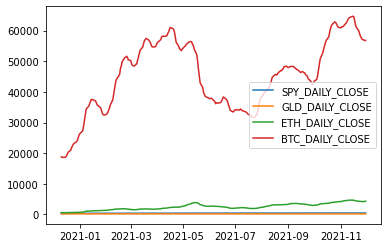

In [90]:
combined_frame.rolling(window=7).mean().plot()

<AxesSubplot:>

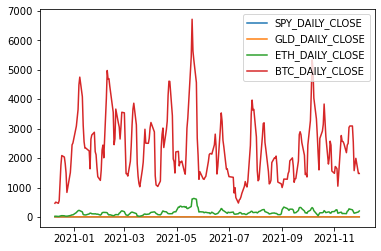

In [91]:
combined_frame.rolling(window=7).std().plot()

In [92]:
daily_returns = combined_frame.pct_change()

In [93]:
daily_returns.dropna()

,SPY_DAILY_CLOSE,GLD_DAILY_CLOSE,ETH_DAILY_CLOSE,BTC_DAILY_CLOSE
2020-12-03,-0.000273,0.007874,0.031578,0.011417
2020-12-04,0.008618,-0.002835,-0.075598,-0.038752
2020-12-07,-0.002055,0.014914,0.038730,0.026505
2020-12-08,0.002926,0.003488,-0.061581,-0.044178
2020-12-09,-0.008969,-0.017094,0.033086,0.012203
...,...,...,...,...
2021-11-23,0.001326,-0.008652,0.062177,0.023292
2021-11-24,0.002670,-0.000957,-0.015912,-0.006997
2021-11-26,-0.022303,-0.001616,-0.054376,-0.060242
2021-11-29,0.012267,-0.001379,0.100529,0.075741


<AxesSubplot:>

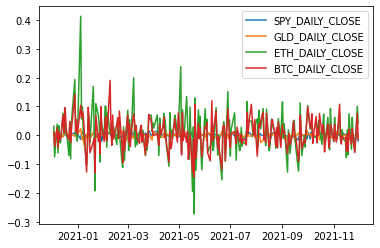

In [94]:
daily_returns.plot()

<AxesSubplot:>

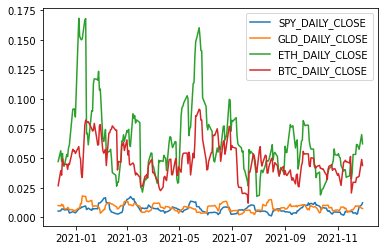

In [95]:
daily_returns.rolling(window=7).std().plot()

In [96]:
cumulative_returns = (1 + daily_returns).cumprod() - 1
cumulative_returns

,SPY_DAILY_CLOSE,GLD_DAILY_CLOSE,ETH_DAILY_CLOSE,BTC_DAILY_CLOSE
2020-12-02,NaN,NaN,NaN,NaN
2020-12-03,-0.000273,0.007874,0.031578,0.011417
2020-12-04,0.008343,0.005016,-0.046407,-0.027777
2020-12-07,0.006270,0.020005,-0.009475,-0.002009
2020-12-08,0.009215,0.023562,-0.070472,-0.046097
...,...,...,...,...
2021-11-23,0.294433,-0.024379,6.272549,1.997367
2021-11-24,0.297889,-0.025312,6.156827,1.976396
2021-11-26,0.268942,-0.026887,5.767666,1.797093
2021-11-29,0.284508,-0.028228,6.448014,2.008948


<AxesSubplot:>

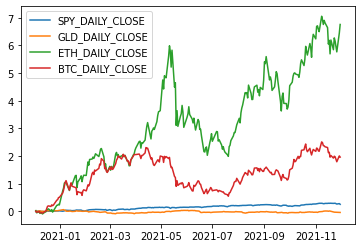

In [97]:
cumulative_returns.plot()

In [98]:
#normalized charts

<AxesSubplot:>

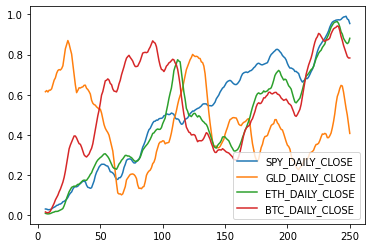

In [99]:
scaled_combined_frame.rolling(window=7).mean().plot()

<AxesSubplot:>

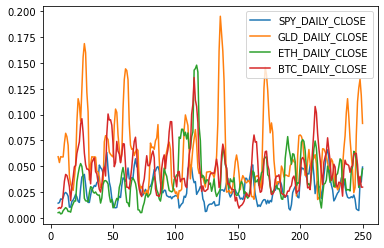

In [100]:
scaled_combined_frame.rolling(window=7).std().plot()

In [102]:
import seaborn as sns
%matplotlib inline

In [103]:
correlation = daily_returns.corr()
correlation

,SPY_DAILY_CLOSE,GLD_DAILY_CLOSE,ETH_DAILY_CLOSE,BTC_DAILY_CLOSE
SPY_DAILY_CLOSE,1.000000,0.195724,0.162522,0.239882
GLD_DAILY_CLOSE,0.195724,1.000000,0.092000,-0.014059
ETH_DAILY_CLOSE,0.162522,0.092000,1.000000,0.733185
BTC_DAILY_CLOSE,0.239882,-0.014059,0.733185,1.000000


<AxesSubplot:>

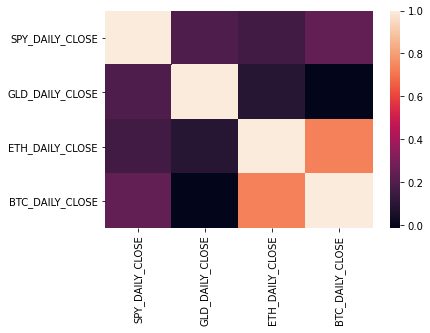

In [104]:
sns.heatmap(correlation)

<AxesSubplot:>

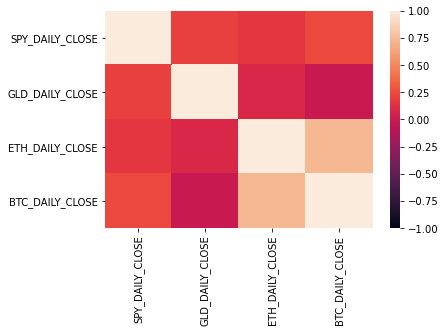

In [105]:
sns.heatmap(correlation, vmin=-1, vmax=1)

In [106]:
 <matplotlib.axes._subplots.AxesSubplot at 0x20d7e6a1be0>

SyntaxError: invalid syntax (<ipython-input-106-b3049add757b>, line 1)